In [ ]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

C:\Users\Dell\miniconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [3]:
fake = pd.read_parquet("../data/training_fake_final.parquet")
fake.head()

,text,label
0,Jacob Zuma and wife admitted to hospital after...,False
1,Apparently Bisi Olatilo and Bolu Akin-Olugbade...,False
2,@lyne_ian @Jeremy05749458 3 hours ago Pope Fra...,False
3,“We commend President Buhari for the swiftness...,False
4,So the hippo that was in Fourways has been sla...,False


In [4]:
# Our spaCy model:
nlp = en_core_web_md.load()

# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []

for summary in nlp.pipe(fake['text']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal 
               and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

# Add tokens to new column
fake['tokens'] = tokens
fake['tokens']

0         [jacob, zuma, wife, admit, hospital, contract]
1      [bisi, olatilo, bolu, akin, olugbade, dead, re...
2      [hour, pope, francis, jorge, bergoglio, arrest...
3      [commend, president, buhari, swiftness, effici...
4                     [hippo, fourway, slaughter, crazy]
                             ...                        
454    [brief, statement, utterance, president, uhuru...
455    [namibian, president, hage, g, geingob, confir...
456    [russia, target, african, countries, missile, ...
457    [breaking, vladamir, putin, issue, statement, ...
458    [photo, brave, little, woman, year, ukrainian,...
Name: tokens, Length: 459, dtype: object

In [6]:
dictionary = Dictionary(fake['tokens'])
print(dictionary.token2id)

{'admit': 0, 'contract': 1, 'hospital': 2, 'jacob': 3, 'wife': 4, 'zuma': 5, 'akin': 6, 'bisi': 7, 'bolu': 8, 'careful': 9, 'dead': 10, 'olatilo': 11, 'olugbade': 12, 'relate': 13, 'arrest': 14, 'bergoglio': 15, 'chit': 16, 'count': 17, 'drug': 18, 'felony': 19, 'francis': 20, 'fraud': 21, 'holy': 22, 'hour': 23, 'human': 24, 'incest': 25, 'indictment': 26, 'jorge': 27, 'paraphernalia': 28, 'pope': 29, 'porn': 30, 'possession': 31, 'trafficking': 32, 'abduct': 33, 'abductor': 34, 'buhari': 35, 'commend': 36, 'difference': 37, 'efficiency': 38, 'eu': 39, 'forum': 40, 'lad': 41, 'occur': 42, 'president': 43, 'rescue': 44, 'rights': 45, 'school': 46, 'schoolgirl': 47, 'swiftness': 48, 'crazy': 49, 'fourway': 50, 'hippo': 51, 'slaughter': 52, 'activity': 53, 'criminal': 54, 'destroy': 55, 'government': 56, 'group': 57, 'herdsman': 58, 'incredible': 59, 'kidnap': 60, 'kidnapping': 61, 'kill': 62, 'livelihoods': 63, 'naira': 64, 'nigerian': 65, 'offer': 66, 'biafrans': 67, 'fulani': 68, 'go'

In [8]:
# Filter dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in fake['tokens']]

In [9]:
lda_model5 = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers = 4, passes=100)
lda_model9 = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=9, workers = 4, passes=100)

In [10]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model5, corpus, dictionary)
pyLDAvis.display(lda_display)

C:\Users\Dell\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


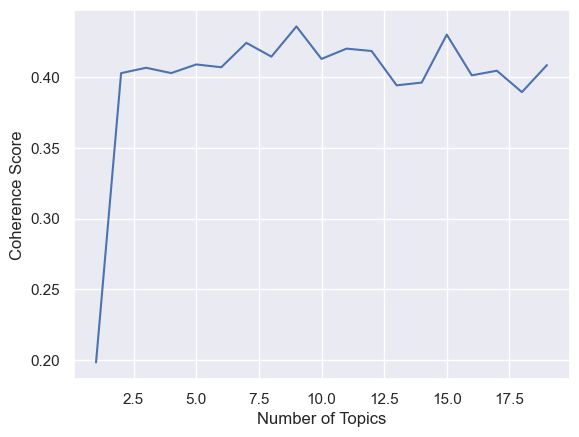

In [11]:
#Optimal Number of Topics using Coherence Score:

# Coherence score using C_v:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = fake['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [12]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model9, corpus, dictionary)
pyLDAvis.display(lda_display)

C:\Users\Dell\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
